<h1 style="text-align: center; font-size: 38px">  Example Multivariable Regression with Python </h1>  <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# read data 
path2 = r"D:\filetraning\data2.txt"
data2 = pd.read_csv(path2, header=None, names=['Size','Badrooms','Price'])


In [3]:
# show data

print('data = ')
print(data2.head(10))
print()
print('data.describe = ')
print(data2.describe())

data = 
   Size  Badrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500

data.describe = 
              Size   Badrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [5]:
# rescaling data

data2 = (data2 - data2.mean()) / data2.std()

print()

print('data after normalization = ')
print(data2.head(10))


data after normalization = 
       Size  Badrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.204036
7 -0.721881 -0.223675 -1.130948
8 -0.781023 -0.223675 -1.026973
9 -0.637573 -0.223675 -0.783051


In [6]:
# add ones column 

data2.insert(0, 'Ones', 1)


In [8]:
# separate X (traning data) from y (target variable)

cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

print('*'*30)
print('x2 data = \n', X2.head(10))
print('y2 data = \n', y2.head(10))
print('*'*30)

******************************
x2 data = 
    Ones      Size  Badrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
5     1 -0.019732  1.090417
6     1 -0.587240 -0.223675
7     1 -0.721881 -0.223675
8     1 -0.781023 -0.223675
9     1 -0.637573 -0.223675
y2 data = 
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
5 -0.323998
6 -0.204036
7 -1.130948
8 -1.026973
9 -0.783051
******************************


In [9]:
# convert to matrices and initialize theta

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

print('X2 \n', X2)
print('X2.shape = ', X2.shape)
print('*'*30)
print('theta2 \n', theta2)
print('theta2.shape = ', theta2.shape)
print('*'*30)
print('y2 \n', y2)
print('y2.shape = ', y2.shape)
print('*'*30)

X2 
 [[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29648

In [10]:
# cost function 

def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))


In [11]:
# GD function 

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [12]:
# initalize varaibles for learning rate and iterations

alpha = 0.1
iters = 100

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

thiscost = computeCost(X2, y2, g2)

In [13]:
print('g2 = ', g2)
print('cost2 = ', cost2)
print('computeCost = ', thiscost)
print('*'*30)

g2 =  [[-5.33261378e-17  8.79020847e-01 -4.74337322e-02]]
cost2 =  [0.40693147 0.34617152 0.30110291 0.26742183 0.24202804 0.22268634
 0.20778332 0.19615275 0.18695011 0.17956245 0.17354364 0.16856787
 0.1643961  0.16085209 0.15780504 0.15515715 0.15283462 0.1507812
 0.14895353 0.14731772 0.14584693 0.14451959 0.14331811 0.14222795
 0.14123687 0.14033451 0.13951191 0.13876131 0.13807589 0.13744961
 0.13687711 0.13635356 0.13587464 0.13543646 0.13503547 0.13466846
 0.13433251 0.13402498 0.13374344 0.13348567 0.13324967 0.13303358
 0.13283572 0.13265455 0.13248866 0.13233675 0.13219766 0.13207029
 0.13195365 0.13184685 0.13174905 0.1316595  0.13157749 0.1315024
 0.13143363 0.13137066 0.131313   0.1312602  0.13121184 0.13116757
 0.13112702 0.13108989 0.13105589 0.13102476 0.13099625 0.13097014
 0.13094623 0.13092434 0.1309043  0.13088594 0.13086913 0.13085373
 0.13083964 0.13082673 0.13081491 0.13080409 0.13079417 0.1307851
 0.13077679 0.13076918 0.13076221 0.13075582 0.13074998 0.1307446

In [14]:
# get best fit line for Szie vs. Price

x = np.linspace(data2.Size.min(), data2.Size.max(), 100)
print('x \n', x)
print('g \n', g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n', f)

x 
 [-1.44542274 -1.39933471 -1.35324669 -1.30715866 -1.26107063 -1.21498261
 -1.16889458 -1.12280656 -1.07671853 -1.0306305  -0.98454248 -0.93845445
 -0.89236643 -0.8462784  -0.80019038 -0.75410235 -0.70801432 -0.6619263
 -0.61583827 -0.56975025 -0.52366222 -0.47757419 -0.43148617 -0.38539814
 -0.33931012 -0.29322209 -0.24713406 -0.20104604 -0.15495801 -0.10886999
 -0.06278196 -0.01669394  0.02939409  0.07548212  0.12157014  0.16765817
  0.21374619  0.25983422  0.30592225  0.35201027  0.3980983   0.44418632
  0.49027435  0.53636238  0.5824504   0.62853843  0.67462645  0.72071448
  0.7668025   0.81289053  0.85897856  0.90506658  0.95115461  0.99724263
  1.04333066  1.08941869  1.13550671  1.18159474  1.22768276  1.27377079
  1.31985881  1.36594684  1.41203487  1.45812289  1.50421092  1.55029894
  1.59638697  1.642475    1.68856302  1.73465105  1.78073907  1.8268271
  1.87291513  1.91900315  1.96509118  2.0111792   2.05726723  2.10335525
  2.14944328  2.19553131  2.24161933  2.28770736 

Text(0.5, 1.0, 'Size vs. Price')

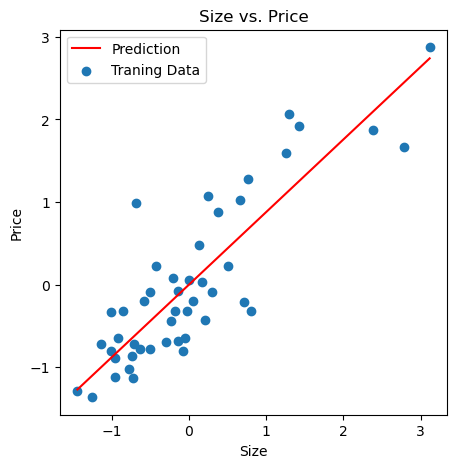

In [16]:
# draw the line for Szie vs. Price 

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(x, f, 'r', label = 'Prediction')
ax.scatter(data2.Size, data2.Price, label = 'Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

In [17]:
# get best fit line for Badrooms vs. Price

x = np.linspace(data2.Badrooms.min(), data2.Badrooms.max(), 100)
print('x \n', x)
print('g \n', g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n', f)

x 
 [-2.85185864 -2.79876402 -2.74566941 -2.69257479 -2.63948018 -2.58638556
 -2.53329095 -2.48019633 -2.42710172 -2.3740071  -2.32091249 -2.26781787
 -2.21472325 -2.16162864 -2.10853402 -2.05543941 -2.00234479 -1.94925018
 -1.89615556 -1.84306095 -1.78996633 -1.73687172 -1.6837771  -1.63068249
 -1.57758787 -1.52449326 -1.47139864 -1.41830403 -1.36520941 -1.3121148
 -1.25902018 -1.20592557 -1.15283095 -1.09973634 -1.04664172 -0.99354711
 -0.94045249 -0.88735788 -0.83426326 -0.78116865 -0.72807403 -0.67497942
 -0.6218848  -0.56879019 -0.51569557 -0.46260096 -0.40950634 -0.35641173
 -0.30331711 -0.25022249 -0.19712788 -0.14403326 -0.09093865 -0.03784403
  0.01525058  0.0683452   0.12143981  0.17453443  0.22762904  0.28072366
  0.33381827  0.38691289  0.4400075   0.49310212  0.54619673  0.59929135
  0.65238596  0.70548058  0.75857519  0.81166981  0.86476442  0.91785904
  0.97095365  1.02404827  1.07714288  1.1302375   1.18333211  1.23642673
  1.28952134  1.34261596  1.39571057  1.44880519

Text(0.5, 1.0, 'Badrooms vs. Price')

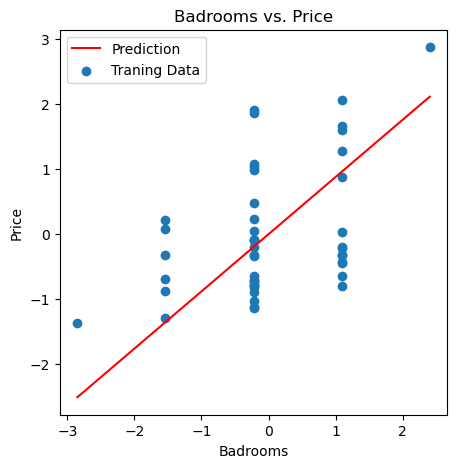

In [18]:
# draw the line for Badrooms vs. Price

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(x, f, 'r', label = 'Prediction')
ax.scatter(data2.Badrooms, data2.Price, label = 'Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Badrooms')
ax.set_ylabel('Price')
ax.set_title('Badrooms vs. Price')

Text(0.5, 1.0, 'Error vs. Training Epoch')

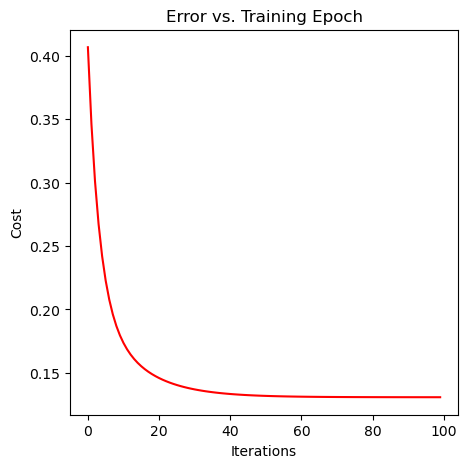

In [19]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')